In [1]:
import numpy as np #package for number operation
import pandas as pd #datframe to store table values
import math
import matplotlib.pyplot as plt #library for plots
#magic function to draw plots - just use it
%matplotlib inline 

In [2]:
#Import of files 
import os #Libraries for file reading
import glob
path = r'C:\Users\Jessie Hu\OneDrive - Imperial College London\PROJECT BSAMA SHARED\BSAMA_Adhesion\Combined BSAMA GelMA Irg RuSPS\\' #Change directory, keep the \\ at the end
extension = 'csv' #define the filetype of interest
os.chdir(path) #change directory to the directory of interest
file_list = glob.glob('*std*.{}'.format(extension)) #get all files in the list with given extension
from pathlib import Path

In [3]:
print(file_list)
hysteresis = np.zeros((len(file_list),5)) #create a placeholder array with zeros to store the results in

['BSAMA Irg 1 05122023 103718_std.CSV', 'BSAMA Irg 1 05172023 093117_std.CSV', 'BSAMA Irg 2 05122023 105715_std.CSV', 'BSAMA Irg 2 05172023 101251_std.CSV', 'BSAMA RuSPS 1 05172023 064438_std.CSV', 'BSAMA RuSPS 2 05172023 070350_std.CSV', 'BSAMA RuSPS 3 05172023 071453_std.CSV', 'BSAMA RuSPS 6 05172023 081257_std.CSV', 'GelMA Irg 1 05122023 070739_std.CSV', 'GelMA Irg 1 05172023 065450_std.CSV', 'GelMA Irg 2 05122023 073443_std.CSV', 'GelMA Irg 2 05172023 072352_std.CSV', 'GelMA Irg 5 05122023 093107_std.CSV', 'GelMA RuSPS 2 05122023 072307_std.CSV', 'GelMA RuSPS 3 05122023 074555_std.CSV', 'GelMA RuSPS 4 05122023 080942_std.CSV', 'GelMA RuSPS 5 05122023 090716_std.CSV']


In [4]:
def dataCleanup(df): 
    df = df.dropna(axis=1) #Remove all the columns that has null values
    df = df.loc[1:] #then remove first row which is units
    
    df['Load']=pd.to_numeric(df['Load 1'])*0.00980665 #convert the str series into numeric values, also gram force to newtons
    df['Disp']=pd.to_numeric(df['Disp']) #convert the str series into numeric values
    #List index where Load hs reached 0
    Disp0Load = df.Load[df.Load == 0].index.tolist()
    # Normalize displacement based on the first instance a load of 0 is reached
    df['Disp Norm'] = df['Disp'] - df['Disp'].iloc[Disp0Load[0]]
    df['Load Norm'] = df['Load'] - df['Load'].iloc[-1]
    
    xarea = (6/2)**2*math.pi #[mm2],x-sectional area of sample
    df['stress']=df['Load Norm']/xarea*10**6 #[Pa]
    df['strain']=df['Disp Norm']/2*100 #%
    df = df[df['stress']>=0].copy() #remove negative stress value rows
    df = df.reset_index(drop=True)
   # fig= plt.figure(figsize=(5,5),dpi=100)

    filepath = Path('folder/'+file_list[filenum]+'.csv')  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    df.to_csv(filepath,index = False) #Saves the cleaned-up dataframe, used for debugging
    return df

In [5]:
from matplotlib import cm
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'Force(N)')

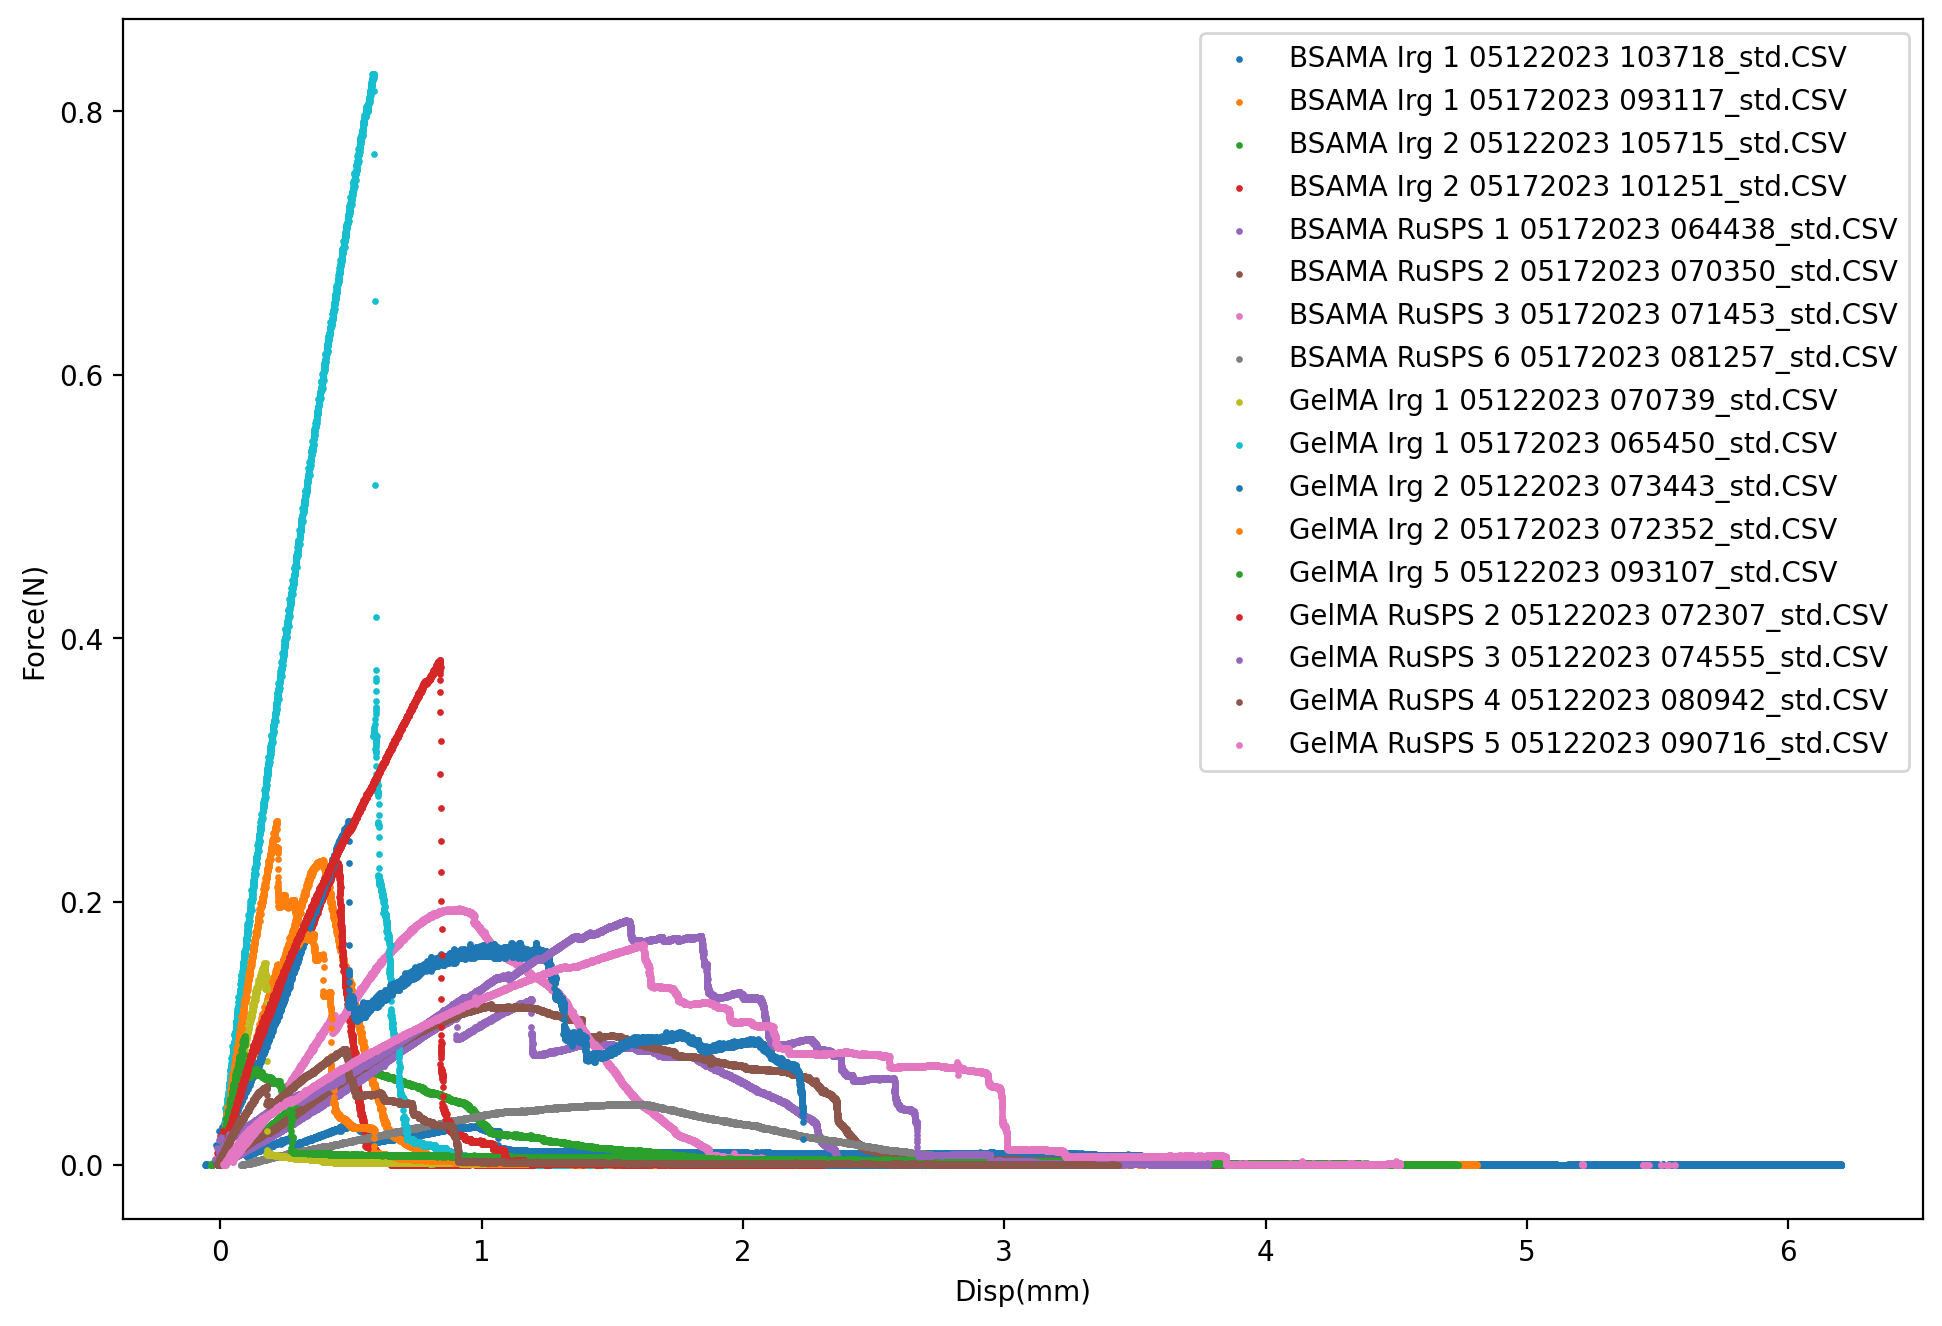

In [6]:
#fig, ax = plt.subplots(4, 3,figsize=(16,12),dpi=100)
#fig.subplots_adjust(wspace=0.3, hspace=0.5)
hysteresis = np.zeros((len(file_list),5)) #create a placeholder array with zeros to store the results in
df_coll={}
fig= plt.figure(figsize=(9,6),dpi=200)
ax = fig.add_axes([0,0,1,1])
filenum=0 #The counter to keep track of which file we're on 
for file in file_list:
    '''File Name Example: H 1-10 10perc 07082022 073708_std.csv'''
    df=pd.read_csv(path+file,skiprows=23) #the raw data is now stored into "df"
    df.columns = df.columns.str.strip() #Strips away the whitespace in the column headers
    
#     DOM = file_list[filenum][0] #Takes the first number in the file name as sample diameter
#     Crosslinker = file_list[filenum][2:6]
#     Concentration = int(file_list[filenum][7:9])/100
    df_clean=dataCleanup(df) #"df_current" now contains the cleaned up version of "df"
    
    df_coll[filenum]=df_clean
    # dataSplice_HysteresisCalc(df_current,hysteresis,filenum) 
    idxmax = df_clean['Load Norm'].idxmax()
    #print(df_clean['Load Norm'].iloc[idxmax])
    #print(np.trapz(df_clean['Load Norm'],df_clean['Disp Norm']))
    
    i = filenum//3
    j=filenum%3
    filenum+=1
#     color='red'
#     if DOM == 'H':
#         if Crosslinker == '1-10':
#             color = 'cyan'
#         else:
#             color = 'blue'
#     else:
#         if Crosslinker == '1-10':
#             color = 'orange'
    plt.scatter(df_clean['Disp Norm'],df_clean['Load Norm'],s=2, label = file)
    
#plt.savefig(Path(path+file).stem) #.stem just gets rid of original file extension

plt.legend()
plt.xlabel('Disp(mm)')
plt.ylabel('Force(N)')

file name			max force	max stress	max strain	adh energy
BSAMA Irg 1 05122023 103718_std.CSV 0.02933169015 1037.3963281360793 23.100000000000005 1.0554869454483786
BSAMA Irg 1 05172023 093117_std.CSV 0.23164287965 8192.690961853003 19.6 3.0348360179783715
BSAMA Irg 2 05122023 105715_std.CSV 0.0712355056 2519.4406310867535 28.35 2.2111372637506816
BSAMA Irg 2 05172023 101251_std.CSV 0.22925005705 8108.06217413478 22.45 2.420075508867802
BSAMA RuSPS 1 05172023 064438_std.CSV 0.1257016397 4445.786069558097 59.400000000000006 5.803520394850931
BSAMA RuSPS 2 05172023 070350_std.CSV 0.12180839965000001 4308.090869869021 51.7 6.913671987736579
BSAMA RuSPS 3 05172023 071453_std.CSV 0.19483852219999998 6891.003091744441 45.65 6.908323725824221
BSAMA RuSPS 6 05172023 081257_std.CSV 0.046395261150000006 1640.8966995693052 75.7 2.592126701397183
GelMA Irg 1 05122023 070739_std.CSV 0.15323871290000002 5419.710806905508 8.650000000000002 0.6590685352311746
GelMA Irg 1 05172023 065450_std.CSV 0.8284167

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


GelMA RuSPS 5 05122023 090716_std.CSV 0.16759564849999997 5927.483533214842 80.89999999999999 10.667156074597989


Text(0, 0.5, 'Stress(Pa))')

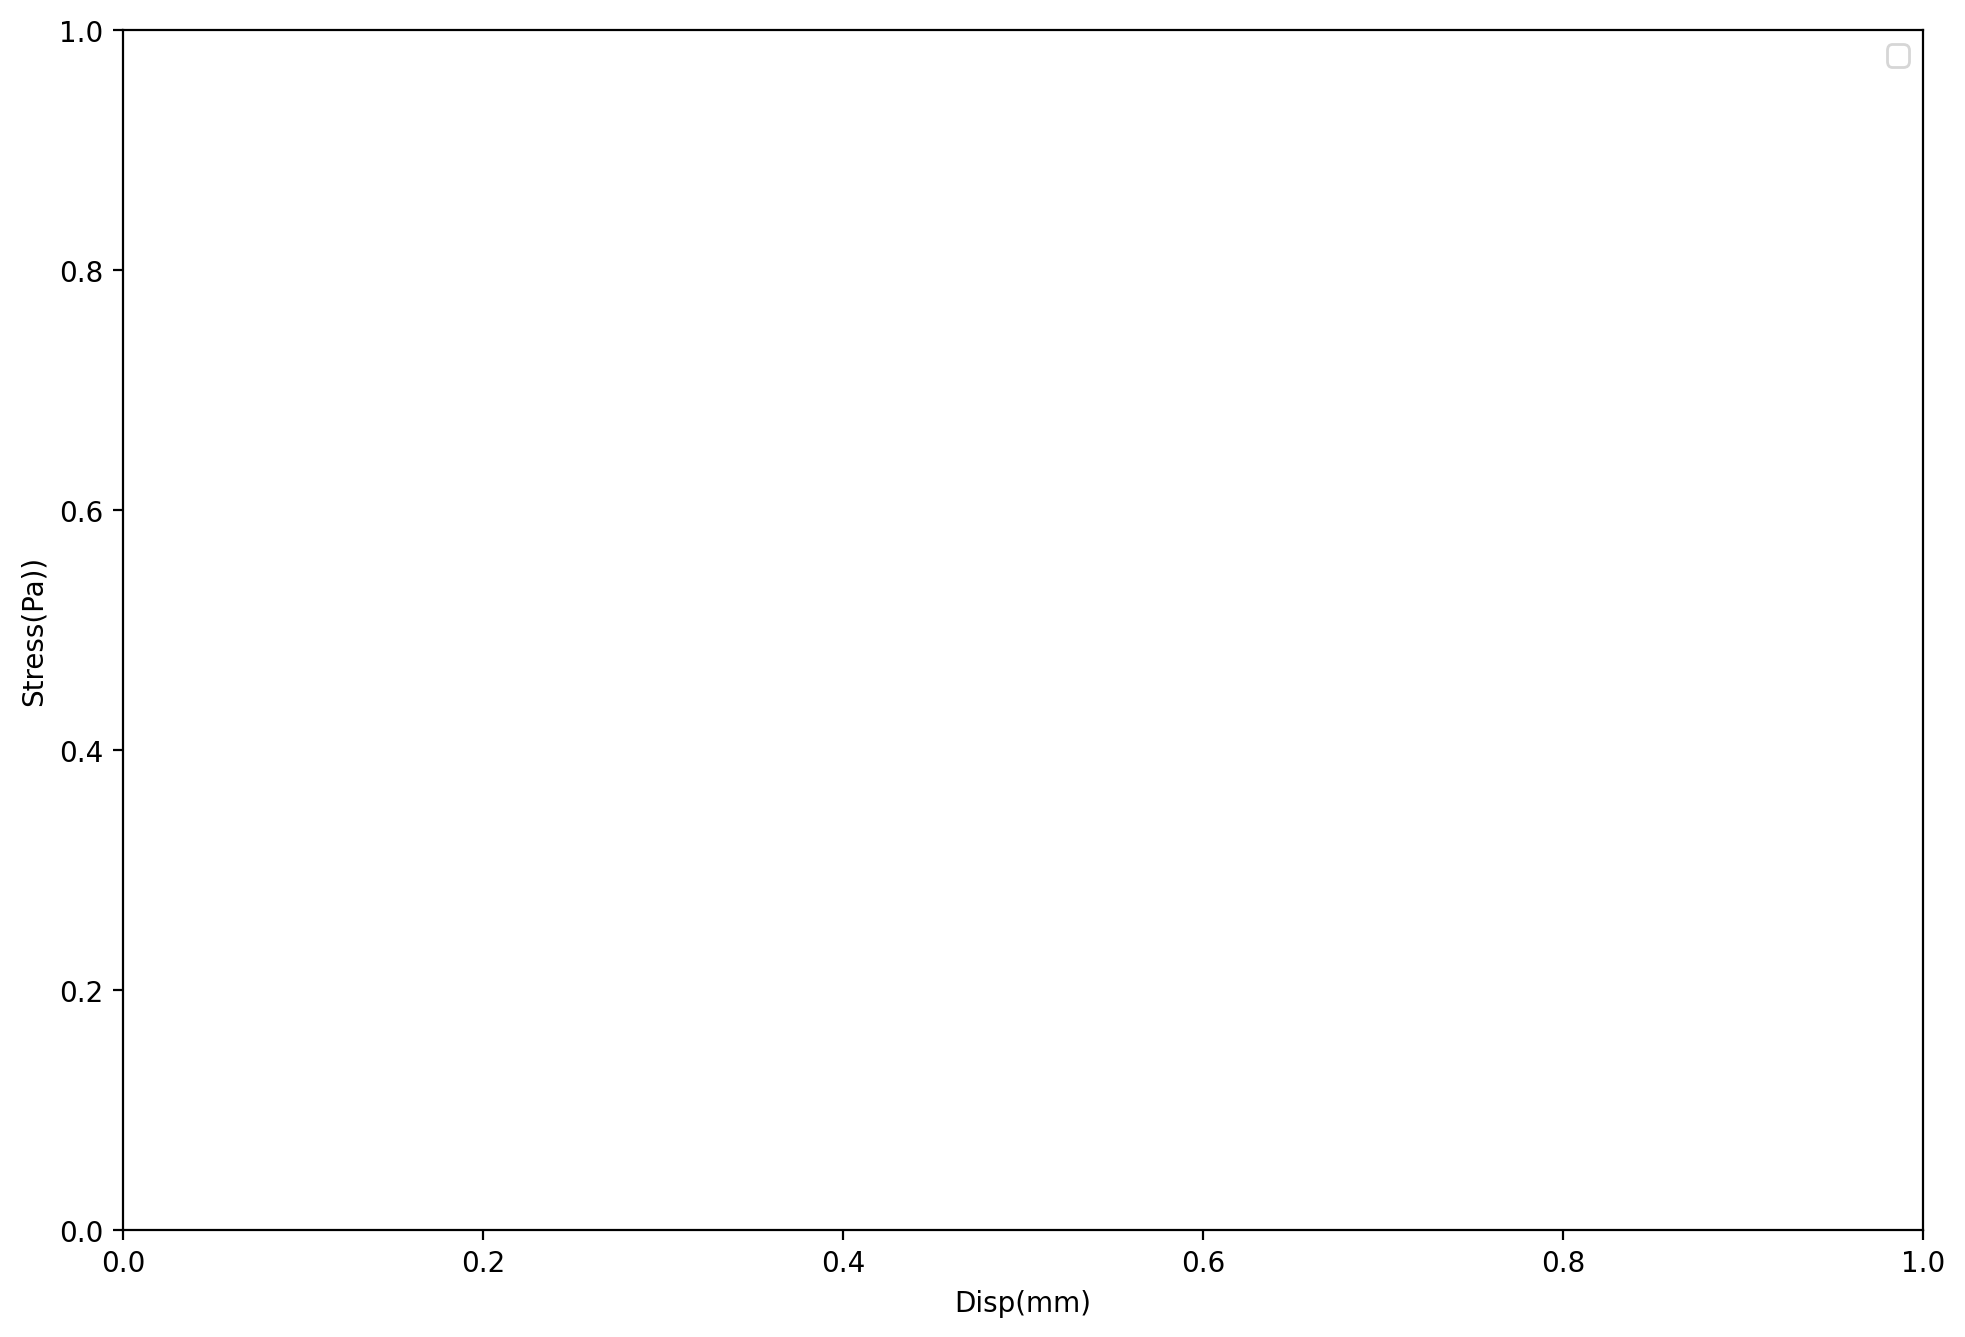

In [7]:
#fig, ax = plt.subplots(4, 3,figsize=(16,12),dpi=100)
#fig.subplots_adjust(wspace=0.3, hspace=0.5)
print('file name\t\t\tmax force\tmax stress\tmax strain\tadh energy')
hysteresis = np.zeros((len(file_list),5)) #create a placeholder array with zeros to store the results in
df_coll={}
fig= plt.figure(figsize=(9,6),dpi=200)
ax = fig.add_axes([0,0,1,1])
filenum=0 #The counter to keep track of which file we're on 
for file in file_list:
    '''File Name Example: H 1-10 10perc 07082022 073708_std.csv'''
    df=pd.read_csv(path+file,skiprows=23) #the raw data is now stored into "df"
    df.columns = df.columns.str.strip() #Strips away the whitespace in the column headers
    
#     DOM = file_list[filenum][0] #Takes the first number in the file name as sample diameter
#     Crosslinker = file_list[filenum][2:6]
#     Concentration = int(file_list[filenum][7:9])/100
    df_clean=dataCleanup(df) #"df_current" now contains the cleaned up version of "df"
    
    df_coll[filenum]=df_clean
    # dataSplice_HysteresisCalc(df_current,hysteresis,filenum) 
    idxmax = df_clean['stress'].idxmax()
    print(file,df_clean['Load Norm'].iloc[idxmax],df_clean['stress'].iloc[idxmax],df_clean['strain'].iloc[idxmax],np.trapz(df_clean['stress'],df_clean['Disp Norm'])/1000)
    #print(np.trapz(df_clean['Load Norm'],df_clean['Disp Norm']))
    
    i = filenum//3
    j=filenum%3
    filenum+=1
    color='red'
#     if DOM == 'H':
#         if Crosslinker == '1-10':
#             color = 'cyan'
#         else:
#             color = 'blue'
#     else:
#         if Crosslinker == '1-10':
#             color = 'orange'
#     plt.scatter(df_clean['Disp Norm'],df_clean['stress'],s=1, label = file)
    
#plt.savefig(Path(path+file).stem) #.stem just gets rid of original file extension

plt.legend()
plt.xlabel('Disp(mm)')
plt.ylabel('Stress(Pa))')

In [8]:
df_coll[1]

,Elapsed Time,Disp,Load 1,Disp Comp,Load,Disp Norm,Load Norm,stress,strain
0,4.9100,-1.191,0.153,-1.203,0.001500,0.002,0.000304,10.752018,0.10
1,4.9200,-1.192,0.244,-1.204,0.002393,0.001,0.001196,42.314394,0.05
2,4.9300,-1.191,0.305,-1.203,0.002991,0.002,0.001795,63.471591,0.10
3,4.9400,-1.191,0.366,-1.202,0.003589,0.002,0.002393,84.628788,0.10
4,4.9500,-1.190,0.397,-1.202,0.003893,0.003,0.002697,95.380806,0.15
...,...,...,...,...,...,...,...,...,...
28170,293.3300,3.615,0.122,3.603,0.001196,4.808,0.000000,0.000000,240.40
28171,293.3400,3.616,0.122,3.604,0.001196,4.809,0.000000,0.000000,240.45
28172,293.3500,3.614,0.122,3.603,0.001196,4.807,0.000000,0.000000,240.35
28173,293.3600,3.614,0.122,3.603,0.001196,4.807,0.000000,0.000000,240.35


KeyError: 17

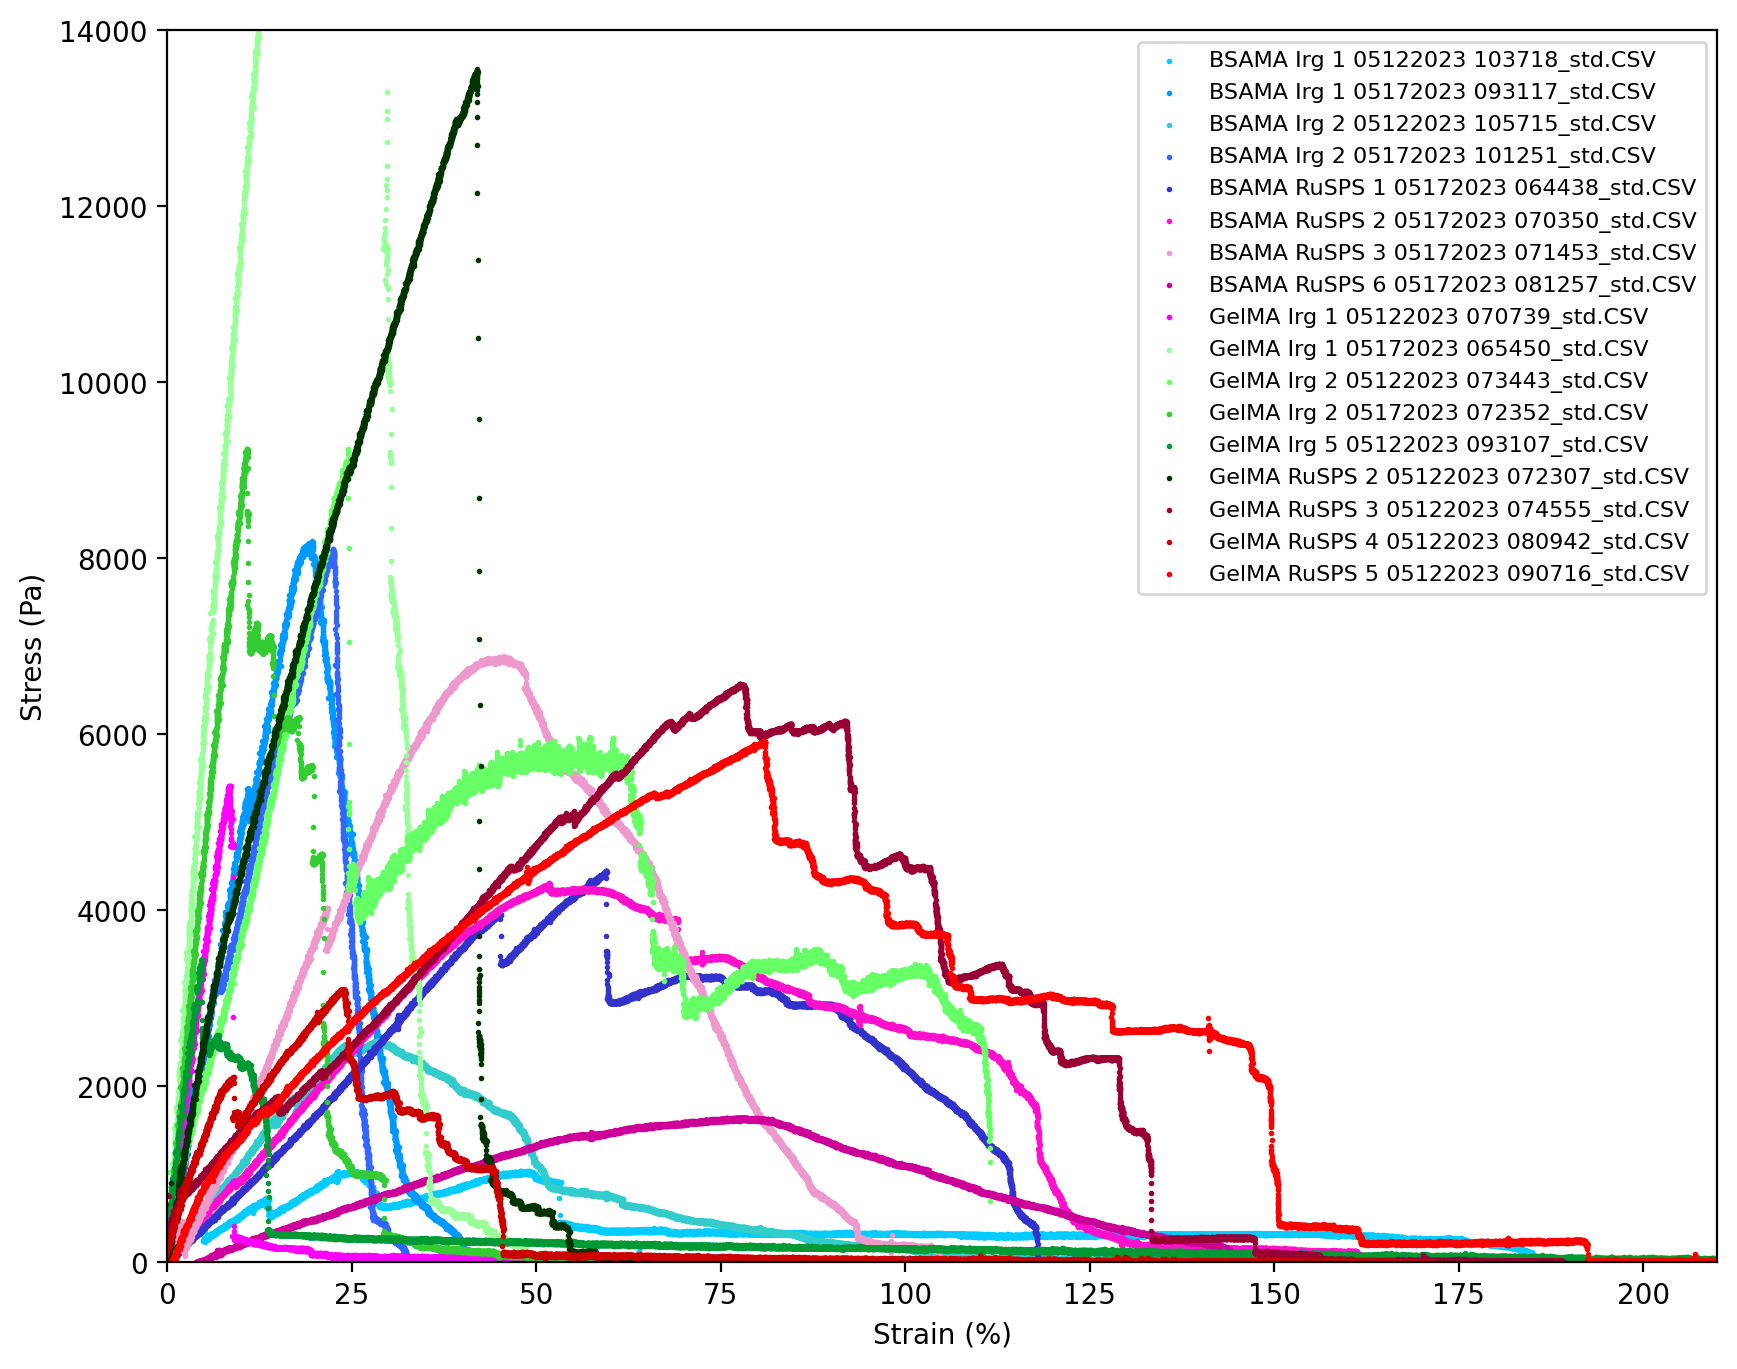

In [9]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
#fig= plt.figure()
#ax = fig.add_axes([0,0,1,1])
color1=['#00ccff','#0099ff','#33cccc','#3366ff','#3333cc']
color2=['#ff10cc','#ee99cc','#cc0099','#ff00ff']
color3=['#99ff99','#66ff66','#33cc33','#009933','#003300']
color4=['#990033','#cc0000','#ff0000','#ff3300']
color = color1+color2+color3+color4
for i in range(18):
    plt.scatter(df_coll[i]['strain'],df_coll[i]['stress'],color=color[i],s=1, label=file_list[i])

    lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=8)   
    plt.ylabel("Stress (Pa)")
    plt.xlabel("Strain (%)")
    plt.ylim(0,14000)
    plt.xlim(0,210)
    
for i in range(18):
    lgnd.legendHandles[i]._sizes = [60]  
#     plt.savefig(Path(path+file_list[i]).stem+'Stress Strain.png') #.stem just gets rid of original file extension

C:\Users\Jessie Hu\AppData\Local\Temp\ipykernel_20376\3062181913.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[i]._sizes = [60]


(0.0, 210.0)

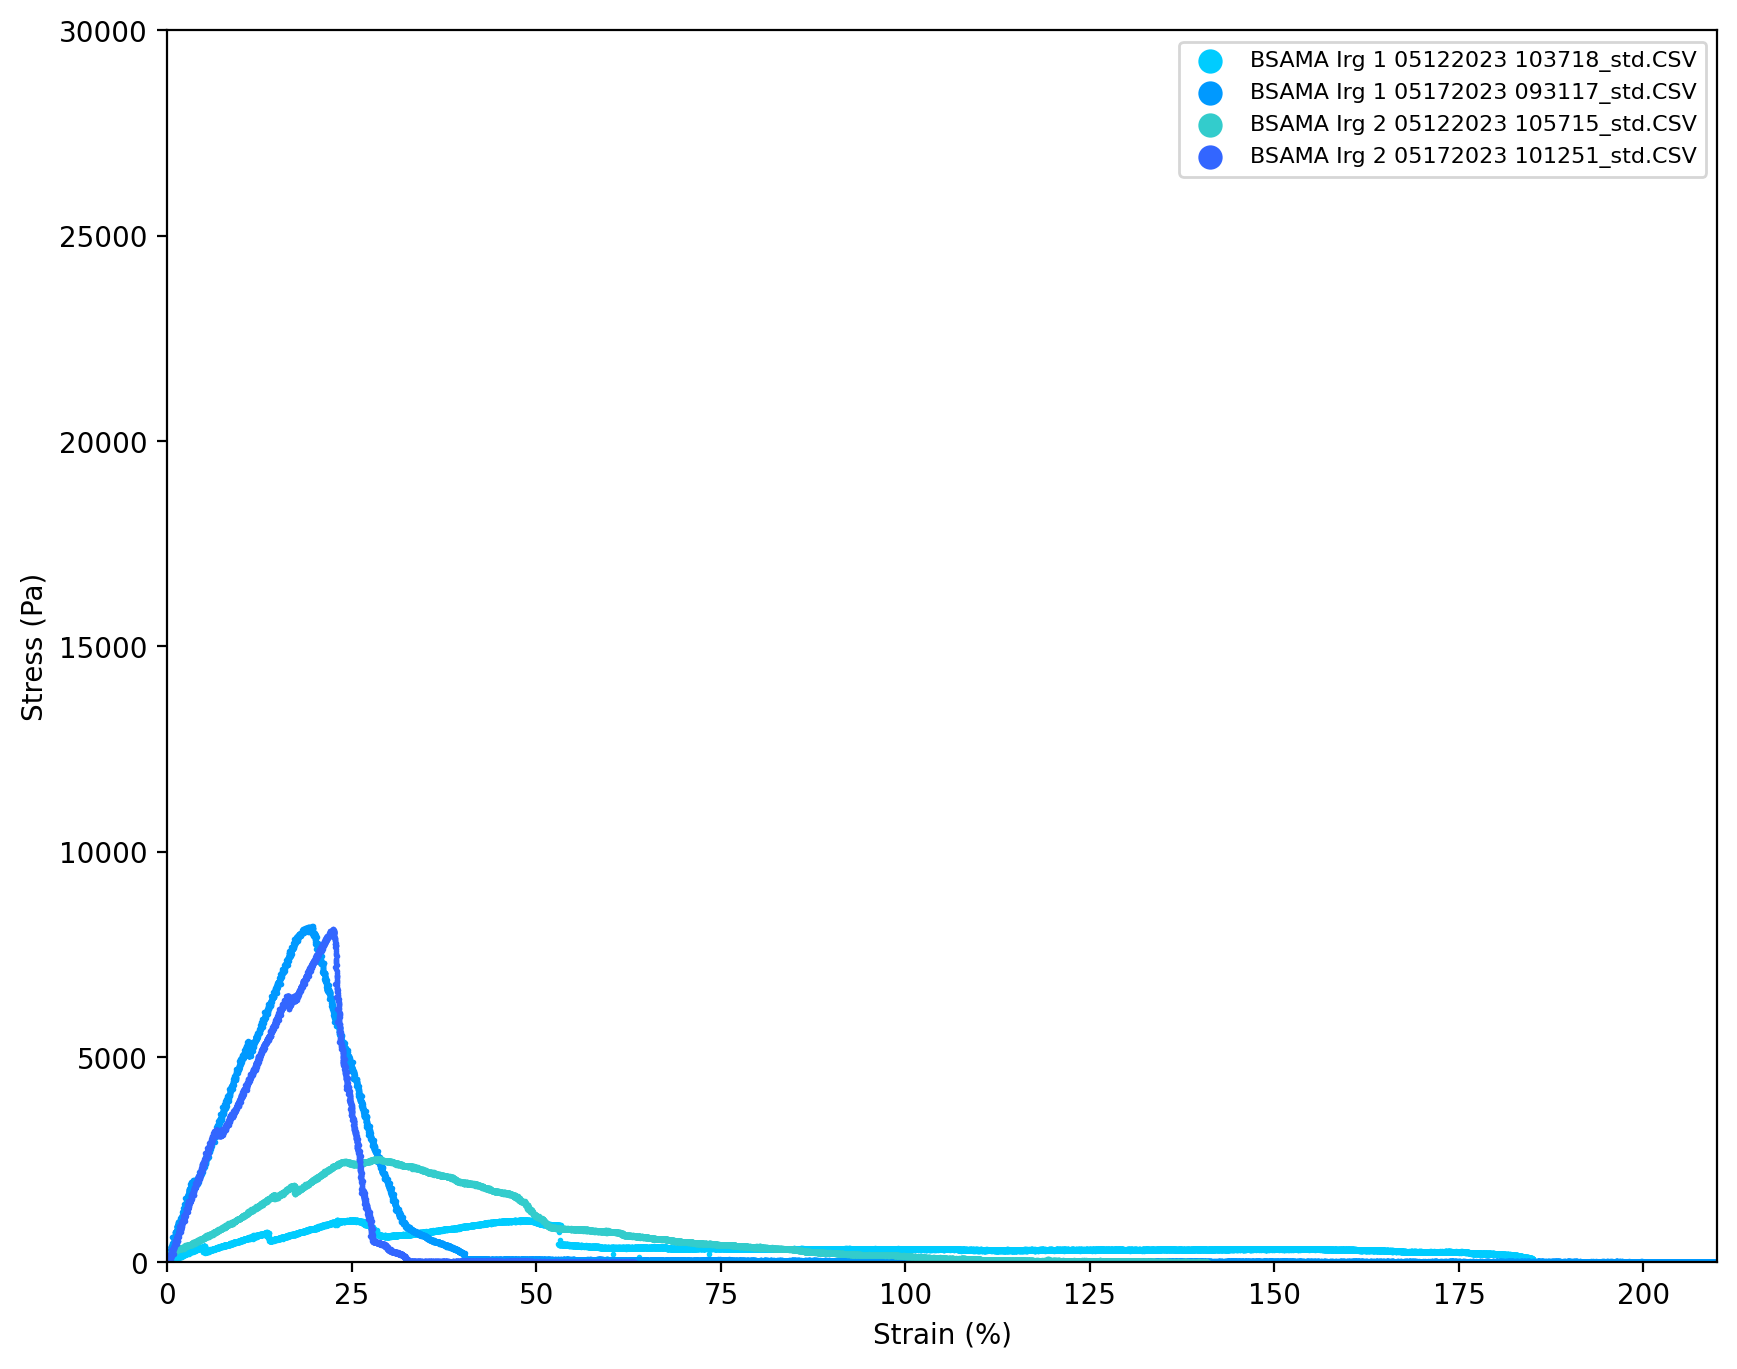

In [10]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
#fig= plt.figure()
#ax = fig.add_axes([0,0,1,1])
for i in range(4):
    plt.scatter(df_coll[i]['strain'],df_coll[i]['stress'],color=color[i],s=1, label=file_list[i])

    lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=8)
for i in range(4):
    lgnd.legendHandles[i]._sizes = [60]
#     
plt.ylabel("Stress (Pa)")
plt.xlabel("Strain (%)")
plt.ylim(0,30000)
plt.xlim(0,210)
# plt.savefig(Path(path+'Stress Strain.png')) #.stem just gets rid of original file extension